<a href="https://colab.research.google.com/github/rsher60/Applied_Artificial_intelligence/blob/master/perceptron_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X= iris.data[:,[2,3]]
y = iris.target

print('class labels:',np.unique(y))

class labels: [0 1 2]


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [0]:
print('labels in counts in y:',np.bincount(y))
print('labels in counts in y:',np.bincount(y_train))
print('labels in counts in y:',np.bincount(y_test))

labels in counts in y: [50 50 50]
labels in counts in y: [40 40 40]
labels in counts in y: [10 10 10]


In [0]:
from sklearn.preprocessing import StandardScaler
#from the preprocessing module we have imported teh standard sclar object that we assigned the sc variable . using the fit method the sc estimates the mean and standard deviation
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=50,eta0=0.1,random_state=1)
ppn.fit(X_train_std,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=50, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = ppn.predict(X_test_std)

In [0]:
print('Misclassified samples :%d'%(y_test != y_pred).sum())

Misclassified samples :4


In [0]:
from sklearn.metrics import accuracy_score
print('accuracy :%2f'%accuracy_score(y_pred,y_test))

accuracy :0.866667


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
  
  #setup marker generator and color map
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  #plot the decision boundaries 
  x1_min , x1_max = X[:,0].min()-1,X[:,0].max()+1
  x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
  
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contour(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  
  
  for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')
    
  #highlight test samples
  
  if test_idx:
    #plot all samples
    X_test ,y_test = X[test_idx,:],y[test_idx]
    
    plt.scatter(X_test[:,0],X_test[:,1],c='',edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100,label='test set')

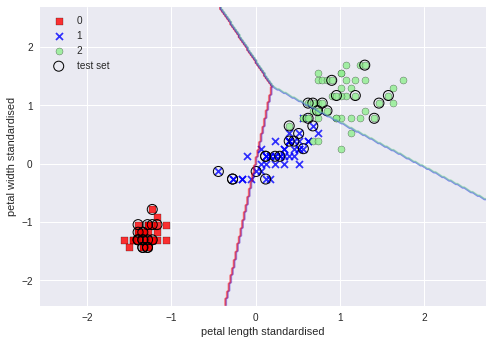

In [0]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('petal length standardised')
plt.ylabel('petal width standardised')
plt.legend(loc='upper left')
plt.show()

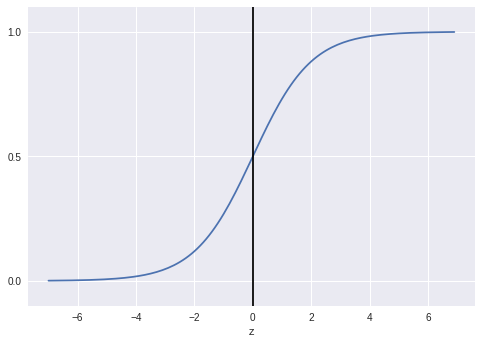

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return(1.0/(1.0+np.exp(-z)))

z = np.arange(-7,7,0.1)

phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt



def sigmoid(z):
  return(1/(1+(np.exp(-z))))

In [0]:
sigmoid(2)

0.8807970779778823

In [0]:
z = np.arange(-10,10)
b=sigmoid(z)

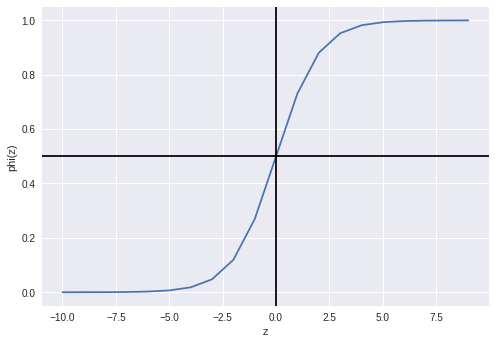

In [0]:
plt.plot(z,b)
plt.xlabel('z')
plt.ylabel('phi(z)')
plt.axvline(0.0,color='k')
plt.axhline(0.5,color='k')
ax=plt.gca()
ax.yaxis.grid(True)

plt.show()

In [0]:
def cost_1(z):
  return -np.log(sigmoid(z))

def cost_0(z):
  return -np.log(1-sigmoid(z))

phi_z = sigmoid(z)



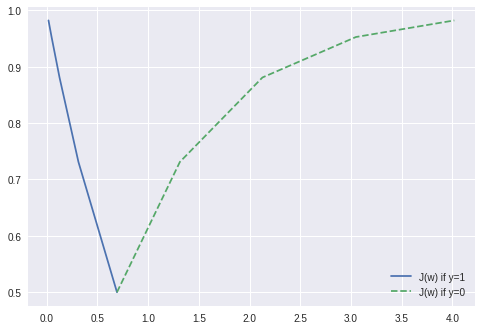

In [0]:
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

plt.plot(c1,phi_z,label='J(w) if y=1')
plt.plot(c0,phi_z,linestyle='--',label='J(w) if y=0')
'''plt.ylim(0.0,5.1)
plt.xlim([0,1])'''
plt.legend(loc='best')
plt.show()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

iris= datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,stratify=y)

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)



from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0,random_state=1)

lr.fit(X_train_std,y_train)


#lr.predict_proba(X_test_std)
lr.predict_proba(X_test_std[:,:]).argmax(axis=1)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2])

In [0]:
from sklearn.linear_model import LogisticRegression
weights , params = [],[]

for c in np.arange(-5,5):
  
  lr = LogisticRegression(C=10.**c,random_state=1)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10.**c)
  
weights = np.array(weights)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

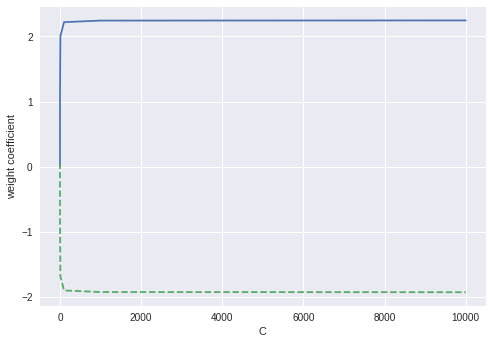

In [0]:
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.show()